# Introduction to Networkx

This colab Notebook is an introduction to NetworkX. I am providing here a brief introduction on the use of Networkx. Many functionalities will be described in details in following tutorials (I will explains also algorithm and graph types)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Create an undirected graph G
G = nx.Graph()
print("graph G is directed: {}".format(G.is_directed()) )

# Create a directed graph H
H = nx.DiGraph()
print("graph H is directed: {}".format(H.is_directed()) )

#getting the number of edges and nodes
G.number_of_nodes(), G.number_of_edges()

graph G is directed: False
graph H is directed: True


(0, 0)

In [3]:
#adding node
G.add_node(1)
G.add_nodes_from([2, 3])
# we can add from another graph 
H = nx.path_graph(3)
G.add_nodes_from(H)
#or directly a graph
G.add_node(H)
G.number_of_nodes(), G.number_of_edges()

(5, 0)

In [4]:
#adding edges
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges())

In [5]:
# Create an undirected graph G
G = nx.Graph() #it is empty
# Add a  first node with node level attributes
G.add_node(0, feature=3, label=0)

# Get attributes of the node 0
attr = G.nodes[0]
print("Node 0 has the attributes {}".format(attr))

Node 0 has the attributes {'feature': 3, 'label': 0}


In [6]:
# You can add multiple nodes with attributes
#a list, providing a tuple (node, dict(feat1, feat2..))
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) 

# we can loop through the nodes 
# argument data = True to return attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
n_nodes = G.number_of_nodes()
print("G has {} nodes".format(n_nodes))

(0, {'feature': 3, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


In [7]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [8]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


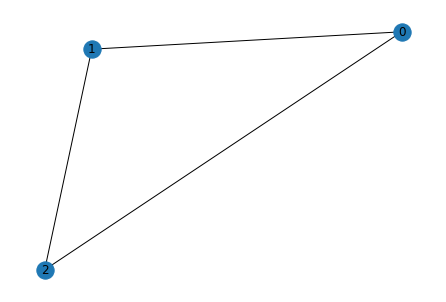

In [9]:
# Draw the graph
nx.draw(G, with_labels = True)

[[0 1 0 1]
 [1 0 0 1]
 [0 0 0 1]
 [1 1 1 0]]


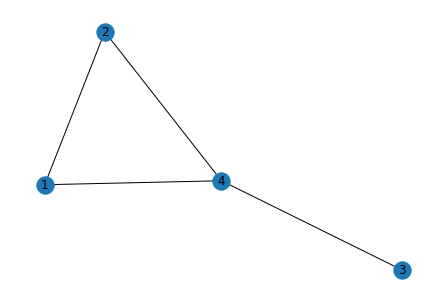

In [11]:
G = nx.Graph()
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2}),
  (3, {"feature": 2, "label": 3}),
  (4, {"feature": 1, "label": 4})
]) 
G.add_edges_from([(2, 1), (1, 4), (4, 2), (4,3)])
# Draw the graph
nx.draw(G, with_labels = True)
A = nx.adjacency_matrix(G)
print(A.todense())

In [12]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbors of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 2
Node 1 has neighbor 4


In [13]:
#shortcuts
#iteration
[n for n in G if n < 3]
#number of nodes
len(G)

4

# karate club

a real example of network and few basic analysis

In [27]:
G = nx.karate_club_graph()

# G is undirected
print("graph G is directed: {}".format(G.is_directed()) )
G.number_of_nodes(), G.number_of_edges()

graph G is directed: False


(34, 78)

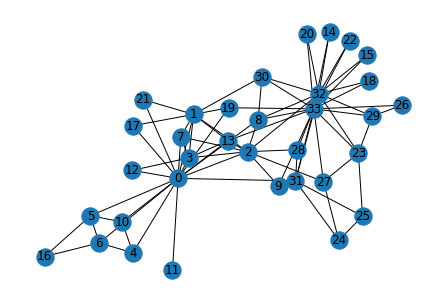

In [15]:
# Visualize the Karate club
nx.draw(G, with_labels = True)

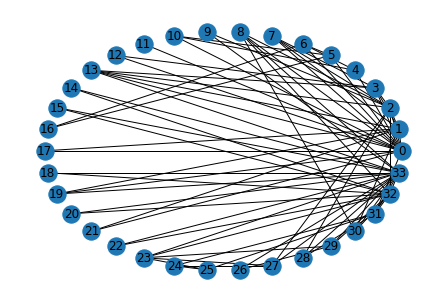

In [28]:
# alternative visualization
nx.draw_circular(G, with_labels=True)

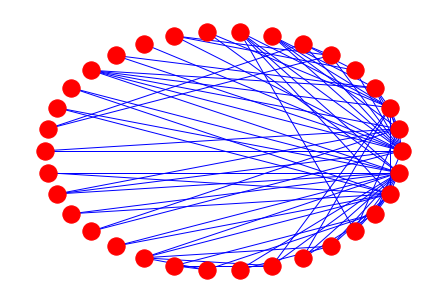

In [29]:
#let's change colors to edge and nodes
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')
#if you want to save
#plt.savefig(‘karate_network.jpg’)

In [18]:
#average degree of the graph
E = G.number_of_edges()
N = G.number_of_nodes()
avg_degree = (2*E)/N
print("average degree of Karate's club is: {}".format(avg_degree) )
#clustering coefficient for a node
print("clustering coeff of node 1: {}".format(nx.clustering(G, 1)) )
#average clustering coefficient for a graph
print("average clust. coeff of Karate's club is: {}".format(nx.average_clustering(G)) )

average degree of Karate's club is: 4.588235294117647
clustering coeff of node 1: 0.3333333333333333
average clust. coeff of Karate's club is: 0.5706384782076823


In [19]:
#clusterering coefficient for all the nodes
print(nx.clustering(G))

{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}


In [24]:
#print the shortest path between two nodes
#note that can be more than one, but it is printing only one
print(nx.shortest_path(G, source=0, target=16))
#all the shortest paths
print([p for p in nx.all_shortest_paths(G, source=0, target=16)])
#length of the shortest path
nx.shortest_path_length(G, source=0, target=16)
#average length of the shortest path
nx.average_shortest_path_length(G)

[0, 5, 16]
[[0, 5, 16], [0, 6, 16]]


2.408199643493761

In [36]:
#centrality measures
#degree centrality
deg_centr = nx.degree_centrality(G)
#closeness centrality
close_cent = nx.closeness_centrality(G)
#Betweenness centrality
bet_centr = nx.betweenness_centrality(G)
# Eigenvector centrality
eig_centr = nx.eigenvector_centrality(G)
#print centrality for a node
deg_centr[0]


0.48484848484848486

In [39]:
#get common neighbors
list(nx.common_neighbors(G,0,33))


[8, 13, 19, 31]